In [1]:
import numpy as np
from plots.common import plot_asset

from finmc.calc.option import opt_price_mc
from finmc.models.localvol import LVMC

In [2]:
# Define Dataset with zero rate curve, and forward curve.
dataset = {
    "MC": {"PATHS": 100_000, "TIMESTEP": 1 / 250},
    "BASE": "USD",
    "ASSETS": {
        "USD": ("ZERO_RATES", np.array([[2.0, 0.05]])),
        "SPX": ("FORWARD", np.array([[0.0, 5500], [1.0, 5600]])),
    },
    "LV": {"ASSET": "SPX", "VOL": 0.3},
}

In [3]:
model = LVMC(dataset)
price = opt_price_mc(100.0, 1.0, "Call", "SPX", model)
print(price)

5229.207536996351


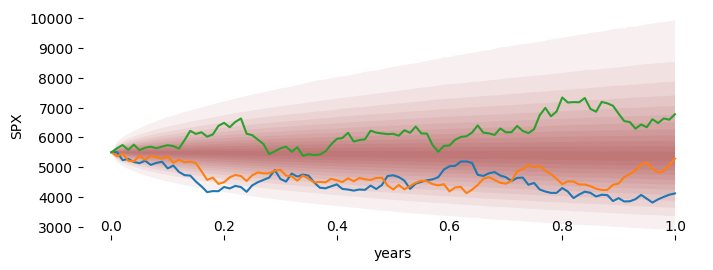

In [4]:
# create the model and plot the progression of short rate
model.reset(dataset)
plot_asset(model, "SPX")